# EDA on Flipkart reviews for batminton dataset

In [1]:
import numpy as np
import pandas as pd

PATH = r"D:\ML\Innomatics_Research_Lab_Internship\task7_flipkart_reviews\reviews_badminton\data.csv"

df = pd.read_csv(PATH)
dataFrame=df

df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [2]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [3]:
df.shape

(8518, 8)

In [4]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of                Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0       

In [6]:
#Renaming the Columns
df.columns = df.columns.str.strip()

df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [8]:
# Check for missing values
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


# Handling missing / Null values

In [9]:
df.fillna({'Reviewer Name': 'Anonymous', 
           'Review Title': 'No Title', 
           'Place of Review': 'Unknown', 
           'Up Votes': df['Up Votes'].median(), 
           'Down Votes': df['Down Votes'].median(), 
           'Month': 'Unknown'}, 
          inplace=True)


In [10]:
# Check for missing values
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [11]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,5
8514,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,2
8515,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4
8516,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,1
8517,Anonymous,No Title,Unknown,0.0,0.0,Unknown,NaN,4


In [12]:
# Convert 'Month' column to datetime data type
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [13]:
# Convert 'Up Votes' and 'Down Votes' columns to integer data type
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [14]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Check the updated data types and column names
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int32
Down_Votes                  int32
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


# Summary Statistics

In [15]:
print(df.describe())


          Up_Votes   Down_Votes      Ratings
count  8518.000000  8518.000000  8518.000000
mean      0.390937     0.121625     4.181028
std      11.607097     3.246117     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


# Interpretation:
The majority of reviews have zero up votes and down votes, as indicated by the 25th, 50th, and 75th percentiles.
However, there are some outliers with a maximum of 889 up votes and 219 down votes.
The ratings range from 1 to 5, with a mean rating of approximately 4.18, indicating generally positive sentiment among reviewers.
These statistics provide valuable insights into the distribution and variability of up votes, down votes, and ratings among the reviews. They can guide further analysis and decision-making processes related to customer satisfaction and engagement with the product.

In [16]:
# Distribution of ratings
print(df['Ratings'].value_counts())

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64


# Data Vizualisation
## distribution analysis

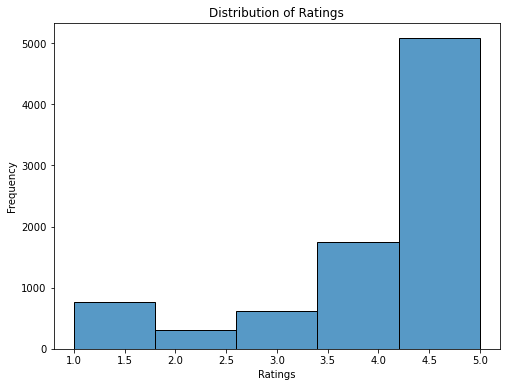

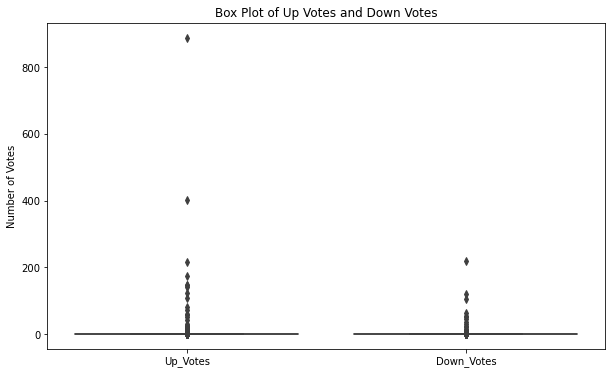

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Box plot of Up Votes and Down Votes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()


# Analyzing the Relationship between Ratings and Engagement Metrics:

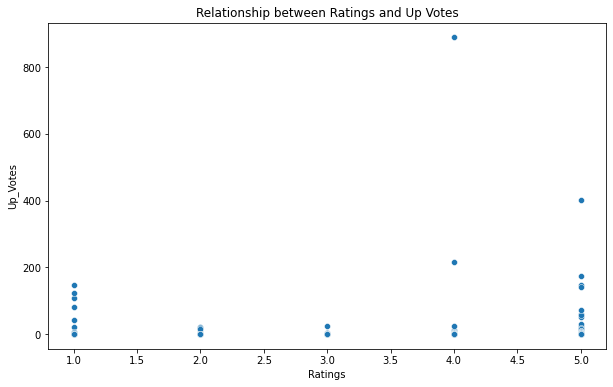

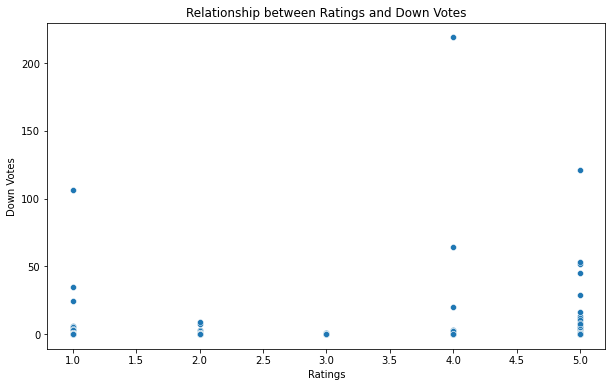

In [18]:
import seaborn as sns

# Scatter plot to visualize the relationship between Ratings and Up Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Up_Votes')
plt.title('Relationship between Ratings and Up Votes')
plt.xlabel('Ratings')
plt.ylabel('Up_Votes')
plt.show()

# Scatter plot to visualize the relationship between Ratings and Down Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Down_Votes')
plt.title('Relationship between Ratings and Down Votes')
plt.xlabel('Ratings')
plt.ylabel('Down Votes')
plt.show()


# Categorical Variable analysis

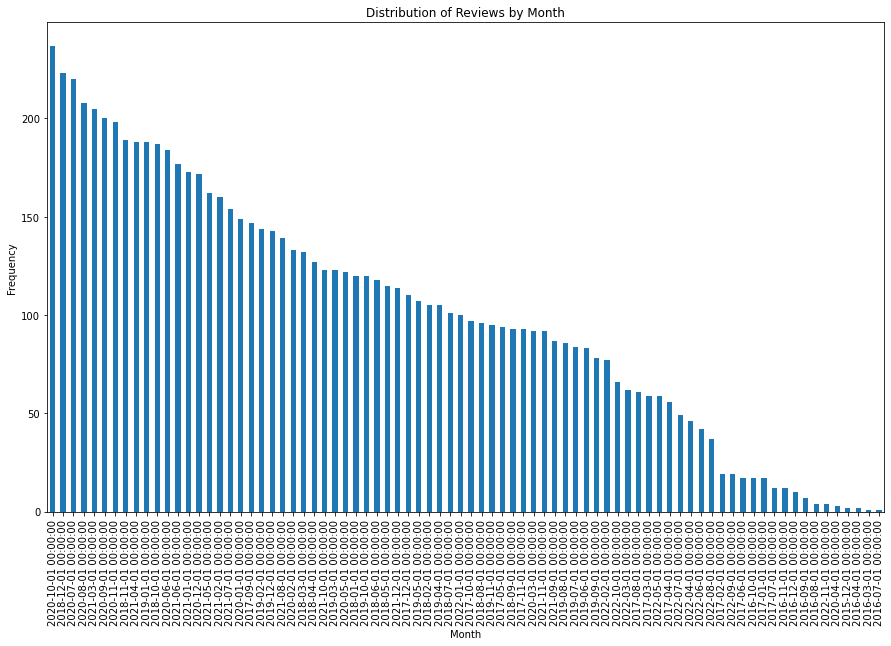

In [19]:
plt.figure(figsize=(15, 9))
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews by Month')
plt.xticks(rotation=90)
plt.show()


# Sentiment Analysis on text data

In [20]:
# Perform sentiment analysis using TextBlob
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Review Text' column
df['Sentiment'] = df['Review_text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


ModuleNotFoundError: No module named 'textblob'

In [21]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\premk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
def get_sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for NaN values


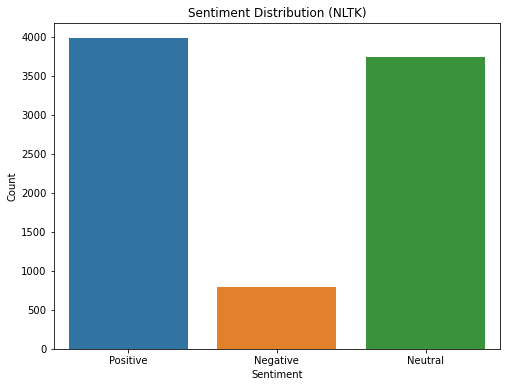

In [23]:
# Apply sentiment analysis to the 'Review_text' column
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Text data cleaning 

In [24]:
print(df['Review_text'])

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
3       Quite O. K. , but nowadays  the quality of the...
4       Over pricedJust â?¹620 ..from retailer.I didn'...
                              ...                        
8513                                                  NaN
8514                                                  NaN
8515                                                  NaN
8516                                                  NaN
8517                                                  NaN
Name: Review_text, Length: 8518, dtype: object


In [25]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = text.lower()  # Convert to lowercase
        # Other preprocessing steps such as removing stopwords, stemming, or lemmatization
        return text
    else:
        return ''  # Return empty string for missing values (NaN)



In [26]:
# Apply text cleaning to the 'Review_text' column
df['clean_text'] = df['Review_text'].apply(clean_text)


In [27]:
print(df['clean_text'])

0       nice product good quality but price is now ris...
1       they didnt supplied yonex mavis  outside cover...
2       worst product damaged shuttlecocks packed in n...
3       quite o k  but nowadays  the quality of the co...
4       over pricedjust  from retaileri didnt understa...
                              ...                        
8513                                                     
8514                                                     
8515                                                     
8516                                                     
8517                                                     
Name: clean_text, Length: 8518, dtype: object


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'Review_text' column
df['clean_text'] = df['clean_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\premk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\premk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\premk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
print(df['clean_text'])

0       nice product good quality price rising bad sig...
1       didnt supplied yonex mavis outside cover yonex...
2       worst product damaged shuttlecock packed new b...
3       quite k nowadays quality cork like year back u...
4       pricedjust retaileri didnt understand wat adva...
                              ...                        
8513                                                     
8514                                                     
8515                                                     
8516                                                     
8517                                                     
Name: clean_text, Length: 8518, dtype: object


# Feature Extraction for text data

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter based on your data size and computational resources

# Fit and transform the preprocessed text data
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert the TF-IDF features to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Concatenate the TF-IDF features with the original DataFrame
df_with_tfidf = pd.concat([df, tfidf_df], axis=1)


In [31]:
print(df_with_tfidf)

               Reviewer_Name               Review_Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513               Anonymous                   No Title   
8514               Anonymous                   No Title   
8515               Anonymous                   No Title   
8516               Anonymous                   No Title   
8517               Anonymous                   No Title   

                  Place_of_Review  Up_Votes  Down_Votes      Month  \
0      Certified Buyer, Chirakkal       889          64 2021-02-01   
1      Certified Buyer, Hyderabad       109           6 2021-02-01   
2     Certified Buyer, Dharmapuri        42           3 2021-04-01   
3        Ce

In [32]:
df_with_tfidf.head()

,Reviewer_Name,Review_Title,Place_of_Review,Up_Votes,Down_Votes,Month,Review_text,Ratings,Sentiment_NLTK,clean_text,...,year,yearsread,yellow,yes,yesterday,yet,yonex,yonexread,youread,yr
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889,64,2021-02-01,"Nice product, good quality, but price is now r...",4,Positive,nice product good quality price rising bad sig...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279146,0.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109,6,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative,didnt supplied yonex mavis outside cover yonex...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.471935,0.0,0.000000,0.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42,3,2021-04-01,Worst product. Damaged shuttlecocks packed in ...,1,Negative,worst product damaged shuttlecock packed new b...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.229114,0.0,0.000000,0.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25,1,NaT,"Quite O. K. , but nowadays the quality of the...",3,Positive,quite k nowadays quality cork like year back u...,...,0.349816,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,ASHIK P A,Over priced,Unknown,147,24,2016-04-01,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Positive,pricedjust retaileri didnt understand wat adva...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


# Sentiment analysis on cleaned text

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\premk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


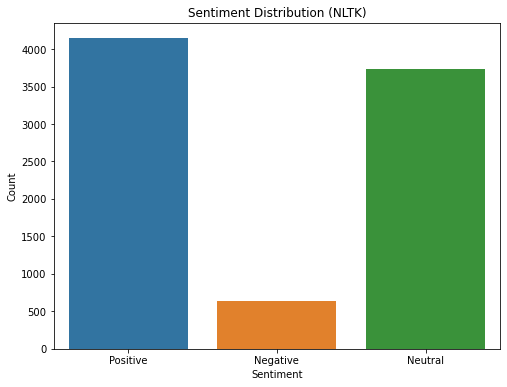

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()
# Apply sentiment analysis to the 'Review_text' column
df['Sentiment_NLTK'] = df_with_tfidf['clean_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [34]:
df_with_tfidf.head()

,Reviewer_Name,Review_Title,Place_of_Review,Up_Votes,Down_Votes,Month,Review_text,Ratings,Sentiment_NLTK,clean_text,...,year,yearsread,yellow,yes,yesterday,yet,yonex,yonexread,youread,yr
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889,64,2021-02-01,"Nice product, good quality, but price is now r...",4,Positive,nice product good quality price rising bad sig...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279146,0.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109,6,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative,didnt supplied yonex mavis outside cover yonex...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.471935,0.0,0.000000,0.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42,3,2021-04-01,Worst product. Damaged shuttlecocks packed in ...,1,Negative,worst product damaged shuttlecock packed new b...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.229114,0.0,0.000000,0.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25,1,NaT,"Quite O. K. , but nowadays the quality of the...",3,Positive,quite k nowadays quality cork like year back u...,...,0.349816,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,ASHIK P A,Over priced,Unknown,147,24,2016-04-01,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Positive,pricedjust retaileri didnt understand wat adva...,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


# Correlation Analysis

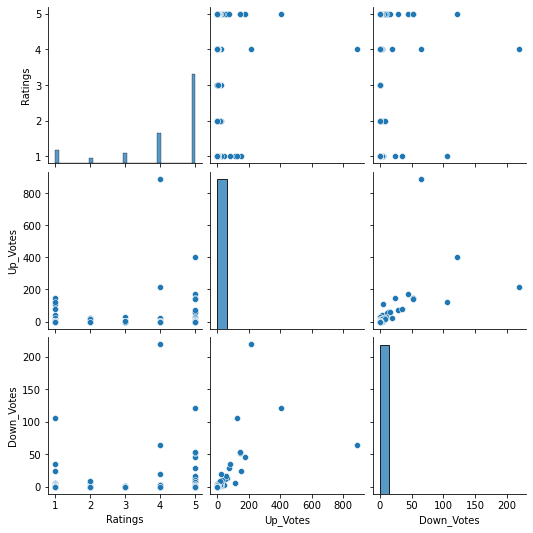

In [35]:
import seaborn as sns
sns.pairplot(df[['Ratings', 'Up_Votes', 'Down_Votes']])
plt.show()


# Temporal Analysis

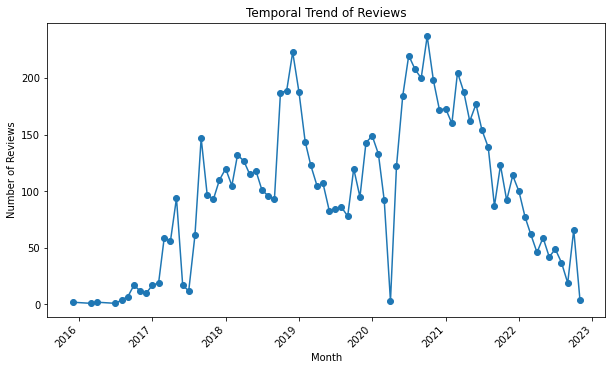

In [36]:
plt.figure(figsize=(10, 6))
df['Month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Temporal Trend of Reviews')
plt.xticks(rotation=45)
plt.show()


In [37]:
df_with_tfidf.columns

Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings', 'Sentiment_NLTK',
       'clean_text',
       ...
       'year', 'yearsread', 'yellow', 'yes', 'yesterday', 'yet', 'yonex',
       'yonexread', 'youread', 'yr'],
      dtype='object', length=1010)

In [38]:
df_with_tfidf.loc[0, 'Review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [39]:
df_with_tfidf.loc[0, 'clean_text']

'nice product good quality price rising bad sign affordable price especially play everyday kindly help u term price thank youread'

In [40]:
df_with_tfidf.loc[1, 'clean_text']

'didnt supplied yonex mavis outside cover yonex ad inside cheapest sad hear thisread'

# Sentiment analysis on ratings 

In [41]:
# Define a function to categorize ratings as positive or negative
def categorize_rating_sentiment(rating):
    if rating >= 3:
        return 'Positive'
    else:
        return 'Negative'

# Apply the function to create a new column for sentiment based on ratings
df_with_tfidf['Sentiment_Rating'] = df_with_tfidf['Ratings'].apply(categorize_rating_sentiment)


In [42]:
# Distribution on target variable looks non-uniform

df_with_tfidf['Sentiment_Rating'].value_counts(normalize=True)

Positive    0.873562
Negative    0.126438
Name: Sentiment_Rating, dtype: float64

# Text data 

In [43]:
# Distribution on target variable looks non-uniform

df_with_tfidf['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: Sentiment_NLTK, dtype: float64

In [44]:
# removing the data where we don't want, i.e.'netural'.
df_with_tfidf = df_with_tfidf[df_with_tfidf.Sentiment_NLTK != "Neutral"]

df_with_tfidf.shape

(4780, 1011)

In [45]:

df_with_tfidf['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.833264
Negative    0.166736
Name: Sentiment_NLTK, dtype: float64

Based on your data preprocessing steps and the creation of sentiment columns, it seems like you have two potential options for your target variable (y) and predictor variables (X):

Using 'Sentiment_Rating' as the target variable (y):

y (Target Variable): 'Sentiment_Rating' column
X (Predictor Variables): TF-IDF features (columns containing TF-IDF values for each word in the vocabulary)
Using 'Sentiment_NLTK' as the target variable (y):

y (Target Variable): 'Sentiment_NLTK' column
X (Predictor Variables): TF-IDF features (columns containing TF-IDF values for each word in the vocabulary)
Choose the option based on your specific objective and the sentiment analysis approach you prefer.

If you trust the sentiment analysis based on ratings ('Sentiment_Rating') more and want to predict sentiment based on the actual ratings, you should consider using 'Sentiment_Rating' as the target variable.

If you prefer the sentiment analysis based on the NLTK library ('Sentiment_NLTK') or if it aligns better with your objectives, you should consider using 'Sentiment_NLTK' as the target variable.

### Iam choosing Sentiment_NLTK for sentiment analysis

In [46]:
# Define a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}

# Map sentiment categories to numerical values in the 'Sentiment_NLTK' column
df_with_tfidf['Sentiment_NLTK_numeric'] = df_with_tfidf['Sentiment_NLTK'].map(sentiment_mapping)

# Display the updated DataFrame
print(df_with_tfidf[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())


  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
3       Positive                       1
4       Positive                       1


In [47]:
# Let us take only the two columns we need
df1 = df_with_tfidf[["clean_text", "Sentiment_NLTK_numeric"]] 
df1.shape

(4780, 2)